In [1]:
#import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data = pd.read_csv(r'C:\Users\hp\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv', encoding='latin1')

In [3]:
data.head()

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
data.shape

(9994, 11)

In [5]:
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Order ID    9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


ï»¿Order ID       object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [6]:
#check missing values
data.isnull().sum()

ï»¿Order ID      0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
#drop any rows with missing values
data.dropna(inplace=True)

In [8]:
#find any duplicates rows
data.duplicated().sum()

0

In [9]:
#Statistics
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [10]:
data.rename(columns={'ï»¿Order ID': 'Order ID'})

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [11]:
data.head()

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [12]:
#Extract date, month, year from 'Order date'
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', dayfirst=True)
data['Day'] = data['Order Date'].dt.day
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

In [13]:
data.head()

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day,Month,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,11,2016


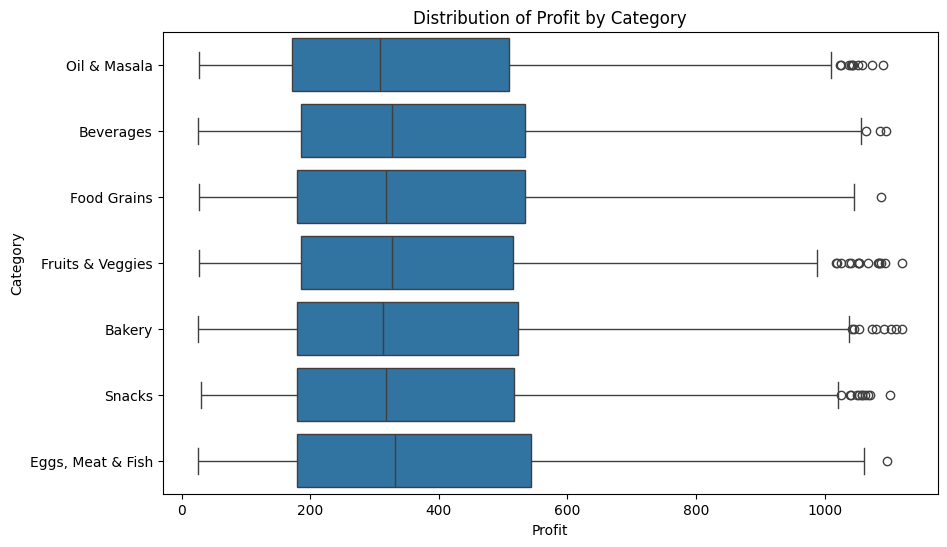

In [14]:
#distribution of Profit by Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Profit', y='Category', data=data)
plt.title('Distribution of Profit by Category')
plt.show()

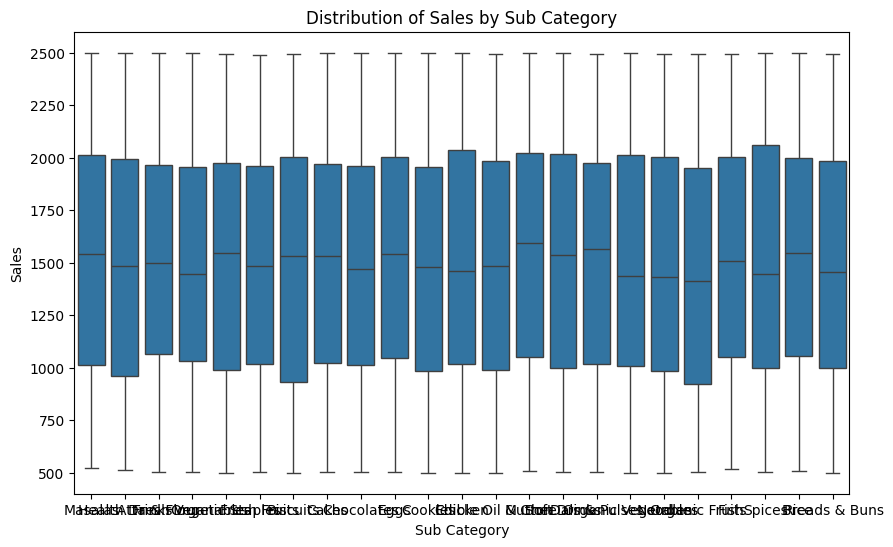

In [15]:
#distribution of Sales by Sub Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Sub Category', y='Sales', data=data)
plt.title('Distribution of Sales by Sub Category')
plt.show()

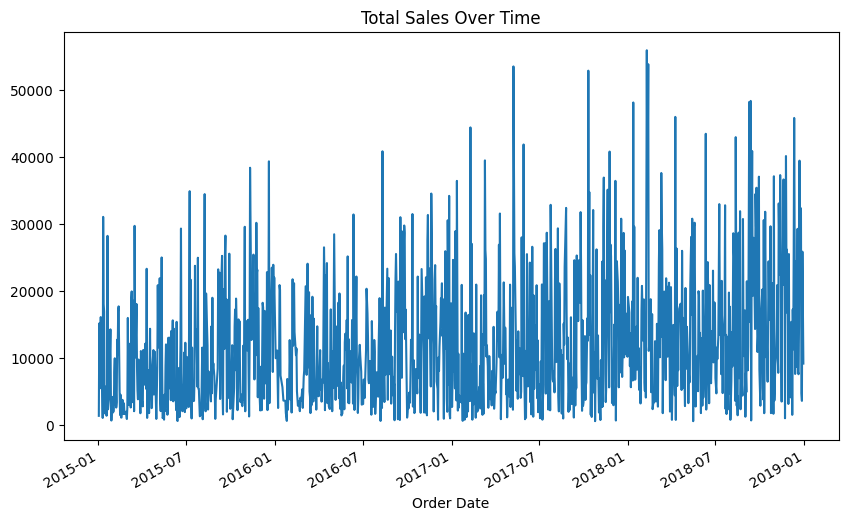

In [16]:
#Sales over time
plt.figure(figsize=(10,6))
data.groupby('Order Date')['Sales'].sum().plot(kind='line')
plt.title('Total Sales Over Time')
plt.show()

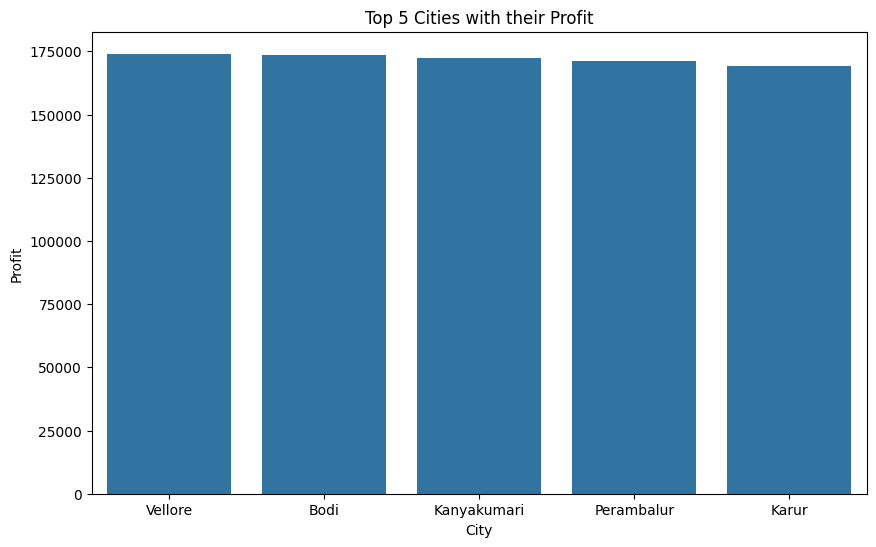

In [17]:
#Top 5 cities with their profit
top_cities = data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Profit', data=top_cities)
plt.title('Top 5 Cities with their Profit')
plt.show()

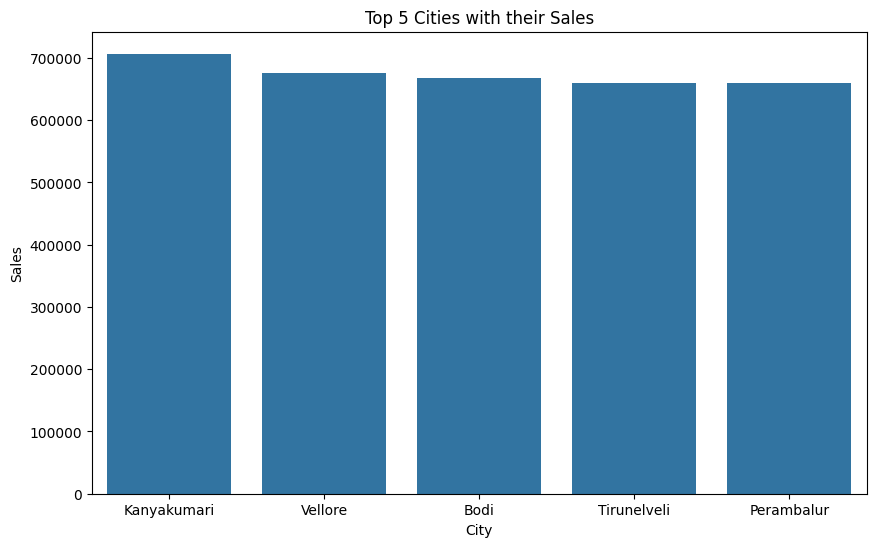

In [18]:
#top cities with Sales
top_cities = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Sales', data=top_cities)
plt.title('Top 5 Cities with their Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

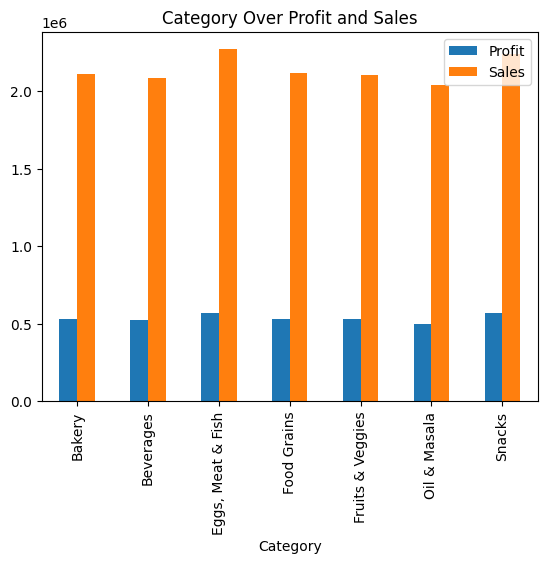

In [19]:
#category over profit and sales
plt.figure(figsize=(10,6))
data.groupby('Category')[['Profit','Sales']].sum().plot(kind='bar')
plt.title('Category Over Profit and Sales')
plt.show()

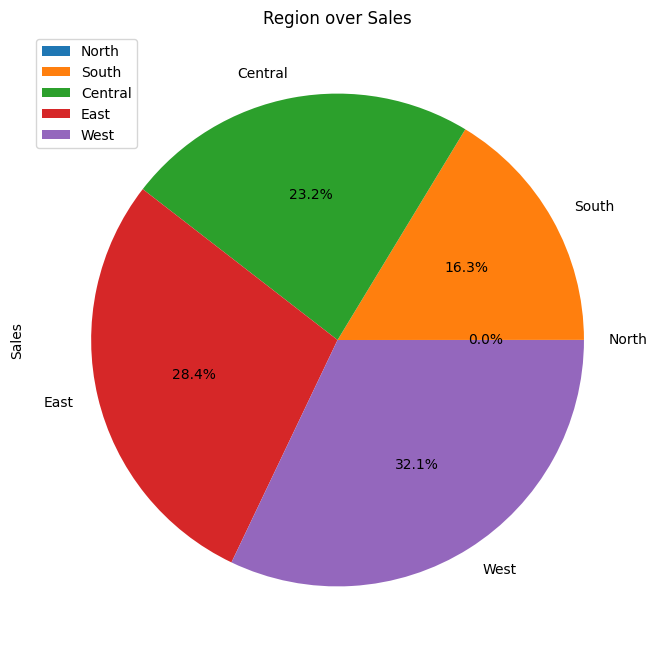

In [20]:
#Region over Sales
plt.figure(figsize=(12,8))
data.groupby('Region')['Sales'].sum().sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='best')
plt.title('Region over Sales')
plt.show()

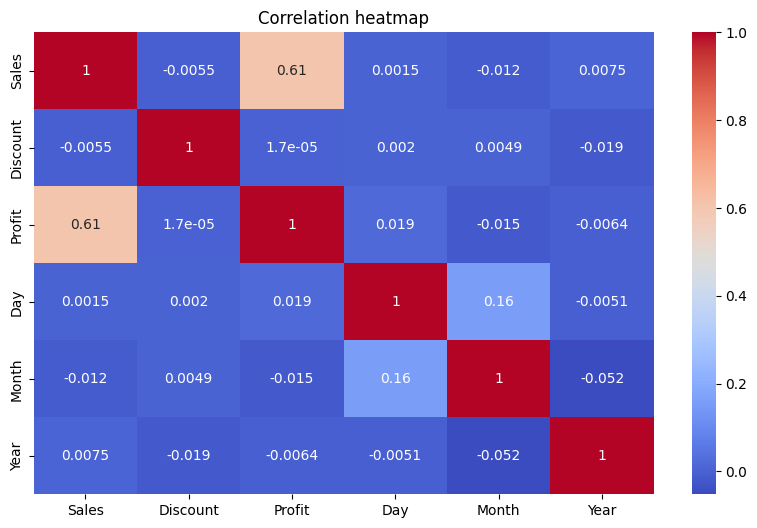

In [21]:
#correlation heatmap
plt.figure(figsize=(10,6))
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
#convert categorical variables in to numerical
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])
data['Sub Category'] = label_encoder.fit_transform(data['Sub Category'])
data['Region'] = label_encoder.fit_transform(data['Region'])
data['City'] = label_encoder.fit_transform(data['City'])
data['State'] = label_encoder.fit_transform(data['State'])

In [24]:
data.head()

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day,Month,Year
0,OD1,Harish,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,8,2017
1,OD2,Sudha,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,8,2017
2,OD3,Hussain,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,12,2017
3,OD4,Jackson,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,11,2016
4,OD5,Ridhesh,3,18,12,2016-11-10,3,2355,0.26,918.45,0,10,11,2016


In [25]:
#Feature selection
X = data.drop(columns=['ï»¿Order ID','Customer Name','Order Date','Day','Month','Year','Sales'])
y = data['Sales']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = LinearRegression() # intialise the model
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test) # prediction model
#Evaluate the model
print('MeanSquaredError:\n', mean_squared_error(y_test, y_pred))
print('R2Score:\n', r2_score(y_test, y_pred))

MeanSquaredError:
 212824.5973664153
R2Score:
 0.3547183704729946


In [29]:
#linear model with target Profit
X = data.drop(columns=['ï»¿Order ID','Customer Name','Order Date','Day','Month','Year','Sales'])
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression() # intialise the model
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test) # prediction model
#Evaluate the model
print('MeanSquaredError:\n', mean_squared_error(y_test, y_pred))
print('R2Score:\n', r2_score(y_test, y_pred))

MeanSquaredError:
 1.7899652513508917e-26
R2Score:
 1.0


In [30]:
#linear model with target Discount
X = data.drop(columns=['ï»¿Order ID','Customer Name','Order Date','Day','Month','Year','Sales'])
y = data['Discount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression() # intialise the model
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test) # prediction model
#Evaluate the model
print('MeanSquaredError:\n', mean_squared_error(y_test, y_pred))
print('R2Score:\n', r2_score(y_test, y_pred))

MeanSquaredError:
 5.316780589345153e-33
R2Score:
 1.0


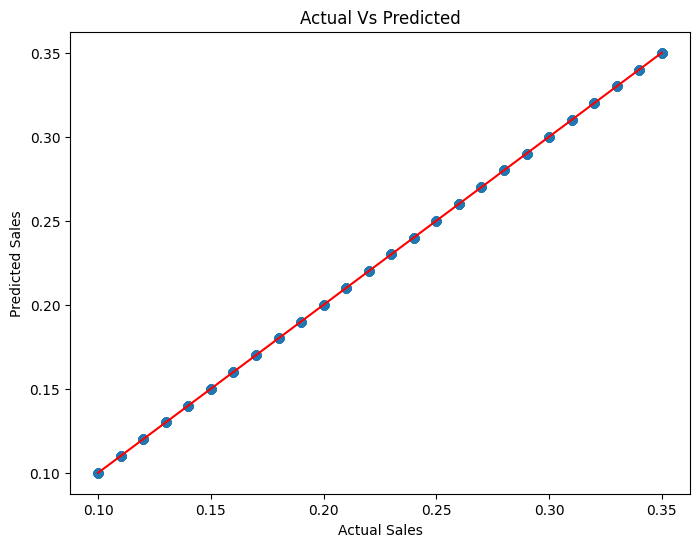

In [31]:
#Actual VS Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Vs Predicted')
plt.show()